# Project 2: Named Entity Recognition (NER) with Sequence Labeling Models
## CS4740/5740 Fall 2021

### Project Submission Due: Oct 15th, 2021 (11.59PM)
Please submit **pdf file** of this notebook on **Gradescope**, and **ipynb** on **CMS**. For instructions on generating pdf and ipynb files, please refer to project 1 instructions.



**Names:** Liangchen Li, Shuhui Zhu

**Netids:** ll924, sz649

Don't forget to share your newly copied notebook with your partner!


**Reminder: both of you can't work in this notebook at the same time from different computers/browser windows because of sync issues. We even suggest to close the tab with this notebook when you are not working on it so your partner doesn't get sync issues.**


# **Introduction** 🔎

---

In this project, you will implement a model that identifies named entities in text and tags them with the appropriate label. Particularly, the task of this project is **Named Entity Recognition**. A primer on this task is provided further on. The given dataset is a modified version of the CoNLL-2003 ([Sang et al](https://arxiv.org/pdf/cs/0306050v1.pdf)) dataset. Please use the datasets that we have released to you instead of versions found online as we have made simplifications to the dataset for your benefit. Your task is to develop NLP models to identify these named entities automatically. We will treat this as a **sequence-tagging task**: for each token in the input text, assign one of the following 5 labels: **ORG** (Organization), **PER** (Person), **LOC** (Location), **MISC** (Miscellaneous), and **O** (Not Named Entity). More information about the dataset is provided later

For this project, you will implement two sequence labeling approaches:
- Model 1 : a Hidden Markov Model (HMM)
- Model 2 : a Maximum Entropy Markov Model (MEMM), which is an adaptation of an HMM in which a Logistic Regression classifier (also known as a MaxEnt classifier) is used to obtain the lexical generation probabilities (i.e., the observation/emission probability matrix, so "observations" == "emissions" == "lexical generations"). Feature engineering is strongly suggested for this model!

Implementation of the Viterbi algorithm (for finding the most likely tag sequence to assign to an input text) is required for both models above, so make sure that you understand it ASAP.

You will implement and train two sequence tagging models, generate your predictions for the provided test set, and submit them to **Kaggle**. Please enter all code in this colab notebook and answer all the questions in the supporting document.

To refresh your memory on HMMs, MEMMs, and Viterbi you can refer to **Jurafsky & Martin Ch. 8.3–8.5** and the lecture slides which can be found on EdStem.

## **Logistics**

---

- You **must** work in **groups of 2 students**. Students in the same group will get the same grade. Thus, you should make sure that everyone in your group contributes to the project. 
- **Remember to form groups on BOTH CMS and Gradescope** or not all group members will receive grades. You can use make a post on EdStem to find a partner for this project.
- Please complete the written questions of this notebook in a clear and informative way. We have created a template document for you to answer the written questions. This document can be found [here](https://docs.google.com/document/d/1vnxYFS-rxxLOYfKG6YN35YktJZnzqQBhE1Mj1Xu7IF0/edit?usp=sharing). Please make a copy of this document for yourself and add your names and netids in the header and answer the written questions on it. You will need to submit this document to gradescope as well (do not forget to do this please!).
- At the end: please make sure to submit the following 3 items:
  1. PDF version of Colab notebook on Gradescope (instructions for converting to PDF are at the end).
  2. PDF version of Google Doc with written answers to the numbered questions on this colab on Gradescope.
  3. .ipynb version of your colab notebook on CMS.

- Note: When submitting the PDF documents to Gradescope (colab notebook & writeup doc) please join/concatenate the PDFs and then submit them as one. You may do this any way you please. You can use [this](https://pdfjoiner.com/) website if you wish to.

## **Advice**

---

1. Please read through the entire notebook before you start coding. That might inform your code structure.
2. Grading breakdown is found at the end; please consult it.
3. Google colab does **not** provide good synchronization; we do not recommend multiple people to work on the same notebook at the same time.
4. The project is somewhat open ended. ("But that's a good thing.  Really. It's more fun that way", says Claire.) We will ask you to implement some model, but precise data structures and so on can be chosen by you. However, to integrate with Kaggle, you will need to submit Kaggle predictions using the given evaluation code (more instructions later).
5. You will be asked to fill in your code at various points of the document. You will also be asked to answer questions that analyze your results and motivate your implementation. Please answer these on an additional writeup document. A template has been provided to you.

## **Named Entity Recognition: A Primer**

---

Let us now take a look at the task at hand: Named Entity Recognition (NER). This section provides a brief introduction to the task and why it is important.

**What is NER?**
NER refers to the information extraction technique of identifying and categorizing key information about entities within textual data. Let's look at an example: 

<br/>

![picture](https://drive.google.com/uc?id=1mxwn1_2Ef16_MJeyl9jJwwR6IohUOeHO)

<br/>

In the above example, we can see that the text has numerous named entities that can be categorized as LOC (location), ORG (organization), PER (person), etc. Today, the task of NER has been overwhelmed by deep learning approaches. However, for this assignment, we will try to do NER using something simpler: HMMs and MEMMs. NER is important for a number of reasons and has a wide variety of use cases such as but not limited to:
  - Detect entities in search engines and voice assistants for more relavent search results.
  - Automatically parsing resumes.
  - ...and many more!


To read more on NER, we refer to any of the following sources:
1. Medium post [1](https://umagunturi789.medium.com/everything-you-need-to-know-about-named-entity-recognition-2a136f38c08f) and [2](https://medium.com/mysuperai/what-is-named-entity-recognition-ner-and-how-can-i-use-it-2b68cf6f545d).
2. Try out [this](https://demo.allennlp.org/named-entity-recognition/named-entity-recognition) AlllenNLP demo!

## **Entity Level Mean F1**

---

Let's take a look at the metrics that you will focus on in this assignment. The standard measures to report for NER are recall, precision, and F1 score
(also called F-measure) evaluated at the **named entity level** (not at the token level). The code for this has been provided later under the validation section under Part 2. Please use this code when evaluating your models. 


If P and T are the sets of predicted and true *named entity spans*, respectively, (e.g, the five named entity spans in the above example are "Zifa", "Renate Goetschl", "Austria", "World Cup", and "Germany") then

####<center>Precision = $\frac{|\text{P}\;\cap\;\text{C}|}{|\text{C}|}$ and Recall = $\frac{|\text{P}\;\cap\;\text{C}|}{|\text{P}|}$.</center><br/>


####<center>F1 = $\frac{2 * \text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}}$. </center><br/>

For each type of named entity, e.g. *LOC*ation, *MISC*ellaneous, *ORG*anization and *PER*son, we calculate the F1 score as shown above, and take the mean of all these F1 scores to get the **Entity Level Mean F1** score for the test set. If $N$ is the total number of labels (i.e., named entity types), then

####<center>Entity Level Mean F1 = $\frac{\sum_{i = 1}^{N} \text{F1}_{{label}_i}}{N}$. </center>

More details under the validation section in Part 2.



# **Part 1: Dataset** 📈

Load the dataset as follows:
  1. Obtain the data from Kaggle at https://www.kaggle.com/c/cs4740-fa21-p2/data.
  2. Unzip the data. Put it into your google drive, and mount it on colab as per below:

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import json
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
path = os.path.join(os.getcwd(), "drive", "MyDrive", "CS_4740_FA21_p2")

with open(os.path.join(path,'train.json'), 'r') as f:
     train = json.loads(f.read())

with open(os.path.join(path,'test.json'), 'r') as f:
     test = json.loads(f.read())

Here's a few things to note about the dataset above:
1. We have just loaded 2 json files: train and test. Please note that these files are different from the original release of the CoNNL-2003 since we have already processed and tokenized them for you. Hence, the documents are represented as a list of strings. Note that it is **not** split into separate training and development/validation sets. You will need to do this yourself as needed using the train set.
2. The train file contains the following 4 fields (each is a nested list): 
  - **'text'** - actual input tokens
  - **'NER'** - the token-level entity tag (ORG/PER/LOC/MISC/O) where **O is used to denote tokens that are not part of any named entity**
  - **'POS'** - the part of speech tag (will be handy for feature engineering of the MEMM model)
  - **'index'** - index of the token in the dataset
3. The test data only has 'text', 'POS' and 'index' fields. You will need to submit your prediction of the 'NER' tag to Kaggle. More instructions on this later!

Let's take a look at a sample sentence from the dataset!

As you can see, the above the sentence, "Romania state budget soars in June.", has already been tokenized into an array of word tokens. The index array corresponds to the index of the token in the entire dataset (not the sentence). The POS tags and the NER tags correspond to the given indices. For example, the token: **Romania** has:
  - index: 0
  - POS: 'NNP'
  - NER: **'ORG'**

### **Q1: Initial Data Observations**
What are your initial observations after you explore the dataset?  Provide some quantitative data exploration. Assess dataset size, document lengths and the token-level NER class distribution, and the entity-level NER class distribution (skipping the 'O' label for the latter). Give some examples of sentences with their named entities bracketed, e.g. [[LOC Romania] state budget soars in June .] and [[ORG Zifa] said [PER Renate Goetschl] of [LOC Austria]...]. 

Present your findings in the supporting template document!

#### **Assess Datset Size**

In [ ]:
print("train sentence amount : ",len(train['text']))
print("test sentence amount : ",len(test['text']))

train sentence amount :  756
test sentence amount :  189


#### **Chcek Sentence Length**

In [ ]:
# def lenth
length_list = []
for sentence in train['text']:
  lenSen = len(sentence)
  length_list.append(lenSen)

less_400 = []
for i in length_list:
  if i<= 400:
    less_400.append(True)
  else:
    less_400.append(False)

The shortest length is : 24
The longest length is : 1335
There are 673 sentences having tokens less than 400


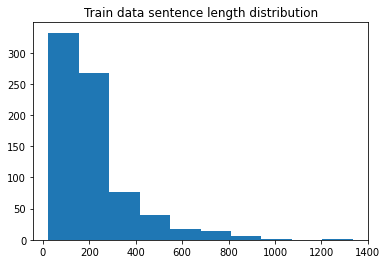

In [ ]:
# copy this
plt.title("Train data sentence length distribution")
plt.hist(length_list)
print("The shortest length is :", min(length_list))
print("The longest length is :", max(length_list))
print("There are {} sentences having tokens less than 400".format(sum(less_400)))

In [ ]:
length_list = []
for sentence in test['text']:
  lenSen = len(sentence)
  length_list.append(lenSen)

less_400 = []
for i in length_list:
  if i<= 400:
    less_400.append(True)
  else:
    less_400.append(False)

The shortest length is : 24
The longest length is : 958
There are 167 sentences having tokens less than 400


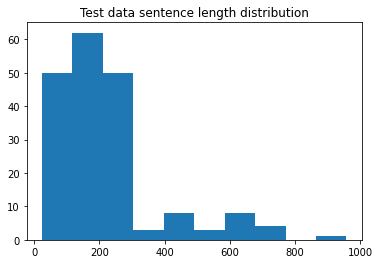

In [ ]:
lt.title("Test data sentence length distribution")
plt.hist(length_list)
print("The shortest length is :", min(length_list))
print("The longest length is :", max(length_list))
print("There are {} sentences having tokens less than 400".format(sum(less_400)))

#### **Level NER Class Distribution**

In [ ]:
def flatten(list_of_list):
  '''
  flatten list of list of token to a single list of token
  
  '''
  flatten = []
  for sub_sentence in list_of_list:
    flatten = flatten + sub_sentence
  return flatten

In [ ]:
# copy this
flat_NER = flatten(train['NER'])
flat_NER_filtered = []
for i in flat_NER:
  if i in ['PER', 'ORG', 'LOC', 'MISC']:
    flat_NER_filtered.append(i)
NER_dict = {"PER":0,"LOC":0,"ORG":0,"MISC":0}
for i in flat_NER_filtered:
  if i == 'PER': NER_dict["PER"]+=1
  if i == 'LOC': NER_dict["LOC"]+=1
  if i == 'ORG': NER_dict["ORG"]+=1
  if i == 'MISC': NER_dict["MISC"]+=1
plt.title("NER tag distribution")
plt.hist(flat_NER_filtered,density=False,orientation='vertical')
print("LOC : {}, ORG: {}, MISC : {}, PER : {}".format(NER_dict["LOC"],NER_dict["ORG"],NER_dict["MISC"],NER_dict["PER"]))

#### **Give** some examples of sentences with their named entities bracketed

# **Part 2: Hidden Markov Model** 🧨

---

1. Code for counting and smoothing of labels and words and unkown word handing as necessary to support the Viterbi algorithm. (This is pretty much what you already know how to do from project 1.)
2. Build a Hidden Markov Model in accordance with the starter code that has been provided. If you wish to change this starter code you can. However, please ensure that your code is clear, concise, and, most important of all, modular. So break your implementation down into functions or write it within a class. We suggest you compute all probabilities in a log form when building the HMM.
3. An implementation of the **Viterbi algorithm** that can be used to infer token-level labels (identifying the appropriate named entity) for an input document. This process is commonly referred to as **decoding**. Bigram-based Viterbi is $ \mathcal{O}(sm^2)$ where s is the length of the sentence and m is the number of tags. Your implementation should have similar efficiency. The code for this can be used later on for the MEMM too.

Code of Academic Integrity:  We encourage collaboration regarding ideas, etc. However, please **do not copy code from online or share code with other students**. We will be running programs to detect plagiarism.


## **Unknown Word Handling**
---

In [ ]:
def unknow_train(text, beyound_die = 0.5,seed=1):
  '''
  This function takes in raw-tokenized text in list of list and returns modified text in list of list with unknow in it.
  For unknow word, dividing those only occur once word types into two groups: number-string, word-string. convert all number-string into unkown,
  keep word-string if the die is greater than the threshold.
  input: text - list of list raw data
         beyound_die - threshold to ignore word type occured only once
         seed - random numpy seed
  '''
  
  word_count = {}
  for comment in text:
    for i in comment:
      if i not in word_count.keys(): word_count[i] = 1
      else: word_count[i] += 1
  
  once_word = []
  for k, v in word_count.items():
    if v == 1:
      once_word.append(k)

  np.random.seed(seed)

  to_unknow = []
  for i in once_word:
    try:
      num = int(i)
      to_unknow.append(i)
    except:
      die = np.random.uniform()
      if die > beyound_die:
        to_unknow.append(i)

  for comment in text:
    for index, token in enumerate(comment):
      if token in to_unknow:
        comment[index] = "unknow"
        
  return text

In [ ]:
def flatten(list_of_list):
  '''
  This function flatten the list of list tokens into a single list.
  input: list_of_list - raw tokenized text data in the form of list of list
  '''

  flatten = []
  for sub_sentence in list_of_list:
    flatten = flatten + sub_sentence
  return flatten

In [ ]:
def unknow_test(train,test):
  '''
  Return test data with unknow in list of list. 
  If token seen in train, keep it as it is. If token not seen in train, replace it with unknow.
  input: train - training data with unknow in form of list of list
         test - raw test data in form of list of list.
  '''
  
  flatten_train = flatten(train)
  for comment in test:
    for index, token in enumerate(comment):
      if token in flatten_train:
        continue
      else:
        comment[index] = 'unknow'
  return test

In [ ]:
def unknow_obs(train_text,comment):
  '''
  Return observation data with unknow in single list.
  input: train_test - training data with unknow in form of list of list
         comment - single tokenized comment in list
  '''
  flatten_train = flatten(train_text)
  for index, token in enumerate(comment):
    if token in flatten_train:
      continue
    else:
      comment[index] = 'unknow'
  return comment

## **HMM Implementation**

---

The code below is just a suggestion for how you may go about building your HMM. Feel free to change it any way you see fit. In fact, you will probably have to tweak it a little to implement smoothing. In the skeleton code below, we have broken down the HMM into its three components: the transition matrix, the emission (i.e., lexical generation, observation) matrix, and the starting state probabilities. We suggest you implement them separately and then use them to build the HMM.

Note: it may help to map your classes (named entity types) to discrete values rather than string labels as you will have to do this for your MEMM anyways. However, the HMM can be done without this.

In [ ]:
# returns the transition probabilities
def build_transition_matrix(labels, s_k=0):
  '''
  input: list of labels
  output: dictionary of keys
  '''

  ### first calc the freq of (xi, xi+1) and (xi) 
  cnt_dict = {}
  temp_dict = {}

  for j in range(len(labels)):
    for i in range(len(labels[j])-1):
      ### consider freq of (xi, xi+1)
      if(labels[j][i] not in cnt_dict.keys()):
        cnt_dict[labels[j][i]] = {}

      if(labels[j][i+1] not in cnt_dict[labels[j][i]].keys()):
        cnt_dict[labels[j][i]][labels[j][i+1]] = 1
      else:
        cnt_dict[labels[j][i]][labels[j][i+1]] += 1 
      ### consider freq of (xi)
      if(labels[j][i] not in temp_dict.keys()):
        temp_dict[labels[j][i]] = 1
      else:
        temp_dict[labels[j][i]] += 1

    ### calc the prob of (xi, xi+1)|(xi)
  prob_dict = cnt_dict.copy()
  for k in cnt_dict.keys():
    for j in cnt_dict[k]:
      prob_dict[k][j] = math.log((cnt_dict[k][j]+s_k)/(temp_dict[k]+s_k*5)) # len(cnt_dict.keys())

  return prob_dict # cnt_dict, temp_dict, 

In [ ]:
def build_emission_matrix(tokens, labels, s=0.5): 
  '''
  Return emission matrix where all values transformed by log
  input: tokens - word tokens with unknow in list of list
         labels - corresponding NER labels in list of list
         s - smoothing factor
  '''

  matrix = {"LOC":{},"O":{},"ORG":{},"MISC":{},"PER":{}}

  for ind_i, sentence_i in enumerate(tokens):
    label_i = labels[ind_i]
    
    for i,label in enumerate(label_i):
        if label == "LOC":
          if sentence_i[i] not in matrix["LOC"].keys():
            for tag in matrix.keys(): matrix[tag][sentence_i[i]] = s  
          else:                                      
            matrix["LOC"][sentence_i[i]] += 1

        if label == "O":
          if sentence_i[i] not in matrix["O"].keys():
            for tag in matrix.keys(): matrix[tag][sentence_i[i]] = s
          else:                                      
            matrix["O"][sentence_i[i]] += 1
        
        if label == "ORG":
          if sentence_i[i] not in matrix["ORG"].keys():
            for tag in matrix.keys(): matrix[tag][sentence_i[i]] = s
          else:                                      
            matrix["ORG"][sentence_i[i]] += 1
        
        if label == "MISC":
          if sentence_i[i] not in matrix["MISC"].keys():
            for tag in matrix.keys(): matrix[tag][sentence_i[i]] = s
          else:                                      
            matrix["MISC"][sentence_i[i]] += 1

        if label == "PER":
          if sentence_i[i] not in matrix["PER"].keys():
            for tag in matrix.keys(): matrix[tag][sentence_i[i]] = s
          else:                                      
            matrix["PER"][sentence_i[i]] += 1

  # Normalization
  for k,v in matrix.items():
    den = sum(v.values())
    for key, value in v.items():
      v[key] = math.log(v[key]/den)
    
  return matrix

In [ ]:
def get_start_state_probs(labels):
  '''
  Return start probability of each NER tag, all values in log transform
  input: labels - NER labels in list of list
  '''
  matrix = {"LOC":0,"O":0,"ORG":0,"MISC":0,"PER":0}

  for sentence in labels:
    if sentence[0] == "LOC":
      matrix["LOC"] +=1
    if sentence[0] == "O":
      matrix["O"] +=1
    if sentence[0] == "ORG":
      matrix["ORG"] +=1
    if sentence[0] == "MISC":
      matrix["MISC"] +=1
    if sentence[0] == "PER":
      matrix["PER"] +=1
  
  # Normalization
  denominator = sum(matrix.values())
  for k,v in matrix.items():
    matrix[k] = math.log(matrix[k]/denominator)   

  return matrix

In [ ]:
def build_hmm(tokens, labels,s=1,O_value=0.2): 
  '''
  Return dictionary of necessary entries in HMM
  input: tokens - word tokens with unknow in list of list
         labels - corresponding NER labels in list of list
         s - smoothing factor used in function build_emission_matrix()
         O_value - weight of NER tag "O" used in function build_tranition_matrix()
  '''
  
  transition = build_transition_matrix(labels,O_value)
  emission   = build_emission_matrix(tokens,labels,s)
  start      = get_start_state_probs(labels)

  hmm = {"transition":transition,"emission":emission,"start":start}

  return hmm

## **Viterbi Implementation**

---

At the end of your implementation, we expect a function or class that maps a sequence of tokens (observation) to a sequence of labels via the Viterbi algorithm.

In [ ]:
def viterbi(hmm, obs):
  '''
  return the predicted NER tag for the given tokenized text, obs
  input: hmm - trained hmm model
         obs - test or validation tokenized text data in single list
  '''

  NER_tag = ["LOC","O","ORG","MISC","PER"]
  NER_tag_dict = {"LOC":0,"O":0,"ORG":0,"MISC":0,"PER":0}
  score_df = pd.DataFrame(NER_tag_dict,index=obs).T
  tag_df = pd.DataFrame(NER_tag_dict,index=obs).T    

  for i,tag in enumerate(NER_tag):
    score_df.iloc[i,0] = hmm['start'][tag] + hmm['emission'][tag][obs[0]]
    tag_df.iloc[i,0]   = 0

  for j, word in enumerate(obs[1:]):
    for i, tag in enumerate(NER_tag):
      five_prob_list = []

      for index, prior_tag in enumerate(NER_tag):
        prior   = score_df.iloc[index,j]
        transit = hmm['transition'][prior_tag][tag]
        emit    = hmm['emission'][tag][word]
        prob    = prior + transit + emit
        five_prob_list.append(prob)

      score_df.iloc[i,j+1] = np.max(five_prob_list)
      tag_df.iloc[i,j+1] = NER_tag[np.argmax(five_prob_list)]
 
  max_index = np.argmax(score_df.iloc[:,-1])
  tag_sq = [NER_tag[max_index]]

  col_number = len(obs)-1
  while col_number > 0:
    last_tag = tag_sq[0]
    last_tag_index = NER_tag.index(last_tag)
    front_tag = tag_df.iloc[last_tag_index,col_number]
    tag_sq.insert(0,front_tag)
    col_number -= 1

  return tag_sq

## **Validation Step**

---

In this part of the project, we expect you to split the training data into train and validation datasets. You may use whatever split you see fit and use any external libraries to perform this split. You may want to look into the following function for splitting data: [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Once you have split the data, train your HMM model on the training data and evaluate it on the validation data. Report **Entity Level Mean F1**, which was explained earlier. Please use the code we have provided below to compute this metric.

Please also take a look into your misclassified cases, as we will be performing error analysis in the *Evaluation* section. We expect smoothing, unknown word handling and correct emission (i.e., lexical generation) probabilities.

Consider the example below. After getting a sequence of NER labels for the sequence of tokens from your Viterbi algorithm implementation, you need to convert the sequence of tokens, associated token indices and NER labels into a format which can be used to calculate **Entity Level Mean F1**. We do this by finding the starting and ending indices of the spans representing each entity (as given in the corpus) and adding it to a list that is associated with the label with which the spans are labelled. To score your validation data on Google Colab or your local device, you can get a dictionary format as shown in the picture below from the function **format_output_labels** of both the predicted and true label sequences, and use the two dictionaries as input to the **mean_f1** function.

NOTE: We do **not** include the spans of the tokens labelled as "O" in the formatted dictionary output.

![picture](https://docs.google.com/uc?export=download&id=1M57DEHgfusVPU_hlvmiOpkS3yn9GGEgj)

In [ ]:
def format_output_labels(token_labels, token_indices):
    """
    Returns a dictionary that has the labels (LOC, ORG, MISC or PER) as the keys, 
    with the associated value being the list of entities predicted to be of that key label. 
    Each entity is specified by its starting and ending position indicated in [token_indices].

    Eg. if [token_labels] = ["ORG", "ORG", "O", "O", "ORG"]
           [token_indices] = [15, 16, 17, 18, 19]
        then dictionary returned is 
        {'LOC': [], 'MISC': [], 'ORG': [(15, 16), (19, 19)], 'PER': []}

    :parameter token_labels: A list of token labels (eg. PER, LOC, ORG or MISC).
    :type token_labels: List[String]
    :parameter token_indices: A list of token indices (taken from the dataset) 
                              corresponding to the labels in [token_labels].
    :type token_indices: List[int]
    """
    label_dict = {"LOC":[], "MISC":[], "ORG":[], "PER":[]}
    prev_label = token_labels[0]
    start = token_indices[0]
    for idx, label in enumerate(token_labels):
      if prev_label != label:
        end = token_indices[idx-1]
        if prev_label != "O":
            label_dict[prev_label].append((start, end))
        start = token_indices[idx]
      prev_label = label
      if idx == len(token_labels) - 1:
        if prev_label != "O":
            label_dict[prev_label].append((start, token_indices[idx]))
    return label_dict

In [ ]:
# Code for mean F1

import numpy as np

def mean_f1(y_pred_dict, y_true_dict):
    """ 
    Calculates the entity-level mean F1 score given the actual/true and 
    predicted span labels.
    :parameter y_pred_dict: A dictionary containing predicted labels as keys and the 
                            list of associated span labels as the corresponding
                            values.
    :type y_pred_dict: Dict<key [String] : value List[Tuple]>
    :parameter y_true_dict: A dictionary containing true labels as keys and the 
                            list of associated span labels as the corresponding
                            values.
    :type y_true_dict: Dict<key [String] : value List[Tuple]>

    Implementation modified from original by author @shonenkov at
    https://www.kaggle.com/shonenkov/competition-metrics.
    """
    F1_lst = []
    for key in y_true_dict:
        TP, FN, FP = 0, 0, 0
        num_correct, num_true = 0, 0
        preds = y_pred_dict[key]
        trues = y_true_dict[key]
        for true in trues:
            num_true += 1
            if true in preds:
                num_correct += 1
            else:
                continue
        num_pred = len(preds)
        if num_true != 0:
            if num_pred != 0 and num_correct != 0:
                R = num_correct / num_true
                P = num_correct / num_pred
                F1 = 2*P*R / (P + R)
            else:
                F1 = 0      # either no predictions or no correct predictions
        else:
            continue
        F1_lst.append(F1)
    return np.mean(F1_lst)

In [ ]:
# Usage using above example

pred_token_labels = ["ORG", "O", "PER", "PER", "O", "LOC", "O", "O", "O", "O", "MISC", "O", "O", "O", "O", "LOC"]
true_token_labels = ["ORG", "O", "PER", "PER", "O", "LOC", "O", "O", "O", "O", "MISC", "MISC", "O", "O", "O", "LOC"]
token_indices = [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

y_pred_dict = format_output_labels(pred_token_labels, token_indices)
print("y_pred_dict is : " + str(y_pred_dict))
y_true_dict = format_output_labels(true_token_labels, token_indices)
print("y_true_dict is : " + str(y_true_dict))

print("Entity Level Mean F1 score is : " + str(mean_f1(y_pred_dict, y_true_dict)))

y_pred_dict is : {'LOC': [(18, 18), (28, 28)], 'MISC': [(23, 23)], 'ORG': [(13, 13)], 'PER': [(15, 16)]}
y_true_dict is : {'LOC': [(18, 18), (28, 28)], 'MISC': [(23, 24)], 'ORG': [(13, 13)], 'PER': [(15, 16)]}
Entity Level Mean F1 score is : 0.75


In [ ]:
def valid(train,beyound_die=0.5,O_value=0.2,s=0.5):
  '''
  Return the model mean f1 score
  input: train - train data
         beyound_die - threshold to ignore word type occured only once
         s - smoothing factor used in function build_emission_matrix()
         O_value - weight of NER tag "O" used in function build_tranition_matrix()
  '''


  X_train, X_test, y_train, y_test = train_test_split(train['text'], train['NER'], test_size=0.1, random_state=0)
  X_pos, X_index, y_pos, y_index = train_test_split(train['POS'], train['index'], test_size=0.1, random_state=0)
  train_unk = unknow_train(X_train,beyound_die)
  test_unk  = unknow_test(train_unk,X_test) 

  hmm = build_hmm(train_unk,y_train,s,O_value)

  index = []
  pred  = []
  true  = []
  for number, comment in enumerate(X_test):     
    pred_tag = viterbi(hmm, comment)
    
    index = index + y_index[number]
    pred = pred + pred_tag
    true = true + y_test[number]

  y_pred_dict = format_output_labels(pred, index)
  y_true_dict = format_output_labels(true, index)

  return mean_f1(y_pred_dict, y_true_dict)

In [ ]:
score = []
position = []
for j in [0.01,0.05,0.1,0.2]:
  for o in [0.01,0.1,0.2,0.3,0.5,0.7,0.8]:
    for i in [0.05,0.1,0.3,0.5,0.7,1]:
      f1 = valid(train,beyound_die=j,O_value=o,s=i)
      score.append(f1)
      position.append((j,o,i))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train['text'], train['NER'], test_size=0.1, random_state=0)
X_pos, X_index, y_pos, y_index = train_test_split(train['POS'], train['index'], test_size=0.1, random_state=0)
train_unk = unknow_train(X_train,0.01)
test_unk  = unknow_test(train_unk,X_test) 
hmm = build_hmm(train_unk,y_train,0.05,0.7)

index = []
pred  = []
true  = []
for number, comment in enumerate(X_test):     
  pred_tag = viterbi(hmm, comment)
  
  index = index + y_index[number]
  pred = pred + pred_tag
  true = true + y_test[number]

y_pred_dict = format_output_labels(pred, index)
y_true_dict = format_output_labels(true, index)

from sklearn.metrics import confusion_matrix
confusion_matrix(true,pred,labels=['LOC','O','ORG','MISC','PER'])

array([[  516,   111,    43,     4,     5],
       [    4, 14379,    21,     8,    72],
       [   74,   301,   547,    11,    12],
       [    8,   127,    11,   287,     3],
       [    9,   325,     5,     1,   575]])

In [ ]:
unk_train = unknow_train(train['text'],0.01)
unk_test  = unknow_test(unk_train,test['text'])

hmm = build_hmm(unk_train,train['NER'],s=0.05,O_value=0.7)

pred  = []
index = []
for i, comment in enumerate(unk_test):
  tag = viterbi(hmm,comment)
  pred = pred + tag
  index = index + test['index'][i]

In [ ]:
di = {'LOC':0,'ORG':0,'MISC':0,'PER':0}
for i in pred:
  if i == 'LOC': di['LOC']+=1
  if i == 'ORG': di['ORG']+=1
  if i == 'MISC': di['MISC']+=1
  if i == 'PER':di['PER']+=1
print(di)

{'LOC': 1428, 'ORG': 1343, 'MISC': 738, 'PER': 1894}


In [ ]:
create_submission('output_hmm.csv',pred,index)

### **Q2.1: Explain your HMM Implementations**

Explain how you implemented the HMM including the Viterbi algorithm (e.g. **which algorithms/data structures** you used). Make clear which parts were implemented from scratch vs. obtained via an existing package. Explain and motivate any design choices providing the intuition behind them (e.g. which methods you used for your HMM implementation, and why?). (Please answer on the written questions template document)


### **Q2.2: Results Analysis**

Explain here how you evaluated the models. Summarize the performance of your system and any variations that you experimented with on the validation datasets. Put the results into clearly labeled tables or diagrams and include your observations and analysis. (Please answer on the written questions template document)


### **Q2.3: Error Analysis**
When did the system work well? When did it fail?  Any ideas as to why? How might you improve the system? (Please answer on the written questions template document)


### **Q2.4: What is the effect of unknown word handling and smoothing?**
(Please answer on the written questions template document)

# **Part 3: Maximum Entropy Markov Model** 💫

---

In this section, you will implement a Maximum Entropy Markov Model (**MEMM**) to perform the same NER task. Your model should consist of a MaxEnt classifier with Viterbi decoding. 

1. We have already performed tokenizations for documents. You can either use a MaxEnt classifier from an existing package or write the MaxEnt code yourself. **Important note:  MaxEnt classifiers are statistically equivalent to multi-class logistic regression, so you can use packages for multi-class LR instead of MaxEnt.**

2. Use the classifier to learn a probability $P(t_i|features)$. You may replace either the lexical generation probability – $P(w_i|t_i)$ – or the transition probability – $P(t_i|t_{i−1})$ – in the HMM with it, or you may replace the entire *lexical generation probability * transition probability*  calculation – $P (w_i|t_i) ∗ P (t_i|t_{i−1)} – $ in the HMM with it. 

3. To train such classifier, you need to pick some feature set. The content of the feature set is up to your choice. You should be trying different feature sets, and evaluate your choices on the validation set. Pick the feature set that performs overall the best according to the F1 measure. If you draw inspiration for your features from external sources, please link them in the code.

4. Use your own implementation of the **Viterbi algorithm**, which you can modify from the one you developed for the HMM model. You will need the probabilities that you obtain from the MaxEnt classifier. 

5. Remember to use same training and validation split when evaluating the MEMM to have a **fair comparison** with your **HMM model**.


Please also take a look into your misclassified cases, as we will be performing error analysis in *Evaluation* section. 





---
Here's a summary of the workflow for Part 3:

![alt text](https://drive.google.com/uc?export=view&id=14VfjW3yDyXLojWM_u0LeJYdDOSLkElBn)




Note that we have not provided any skeleton code for how you should do feature engineering since this is meant to be an open ended task and we want you to experiment with the dataset. However, please remember to make sure that you code is concise, clean, and readable! Ultimately, we expect a function or class  mapping a sequence of tokens to a sequence of labels. At the end of this section you should have done the following:
1. Extract Features
2. Build & Train MaxEnt
3. Call Viterbi when evaluating

### **Feature Engineering**
---

### Feature Engineering

In [ ]:
# Your implementation here
def MEMM_features(word, tag, prev_word, prev_tag, prev_2_word, prev_2_tag,  next_word, next_tag, next_2_word, next_2_tag, wordStartList):  
  features = {}
  features['current_word'] = word
  features['current_tag'] = tag

  features['capitalization'] = int(str(word)[0].isupper())
  features['start_of_sentence'] = int(word in wordStartList)
  features['cap_start'] = int(word not in wordStartList and str(word)[0].isupper())
  features['cap_end'] = int(str(word)[-1].isupper())

  features['previous_tag'] = prev_tag
  features['previous_word'] = prev_word
  features['previous_2_tag'] = prev_2_tag
  features['previous_2_word'] = prev_2_word
  features['next_tag'] = next_tag
  features['next_word'] = next_word
  features['next_2_tag'] = next_2_tag
  features['next_2_word'] = next_2_word
  # features['current_ner'] = curr_ner
  return features

In [ ]:
def MEMM_prob_filter(train_text, train_tag, train_ner, feature_lst, maxiter = 5):
  feature_mtx = []
  wordStartList = []
  sent_len = ' '.join(train_text).split(' . ')
  train_prev_tag = [' '] + train_tag 
  train_prev_text = [' '] + train_text
  train_prev_2_tag = [' ', ' '] + train_tag 
  train_prev_2_text = [' ', ' '] + train_text

 # train_prev_3_tag = [' ', ' ',' '] + train_tag 
 # train_prev_3_text = [' ', ' ', ' '] + train_text

  train_next_tag = train_tag[1:]+[' ']
  train_next_text = train_text[1:]+[' ']
  train_next_2_tag = train_tag[2:]+ [' ', ' ']
  train_next_2_text = train_text[2:]+ [' ', ' ']
  
 # train_next_3_tag = train_tag[3:]+ [' ', ' ', ' ']
 # train_next_3_text = train_text[3:]+ [' ', ' ', ' ']

  for i in range(len(sent_len)):
    temp = sent_len[i].split(' ')[0]
    wordStartList.append(temp)
  train_x = []
  train=[]
  for j in range(len(train_text)):
    temp_feature = MEMM_features(train_text[j], train_tag[j], train_prev_text[j], train_prev_tag[j],train_prev_2_text[j],train_prev_2_tag[j], train_next_text[j], train_next_tag[j], train_next_2_text[j], train_next_2_tag[j], wordStartList)
   # temp_feature = dict((key,value) for key, value in temp_feature.iteritems() if key )
    temp_feature = {k: v for k, v in temp_feature.items() if k in feature_lst}
    train_x.append(temp_feature)
    train.append((temp_feature, train_ner[j]))

  model = MaxentClassifier.train(train,algorithm="iis", max_iter = maxiter) 
  
  return model

In [ ]:
for i in range(len(feature_lst)):
  mm_temp = MEMM_prob_filter(f_X_train_text, flatten(X_train_pos), f_y_train, feature_lst[i], maxiter = 5)
  pred_classifier = mm_temp.classify_many(pd.DataFrame(test_mat)[[feature_lst[i]]].T.to_dict().values())
  temp_df = pd.DataFrame({'pred':pred_classifier, 'true':f_y_val})
  temp_df['true_pred_judge'] = temp_df['pred'] == temp_df['true']
  print(feature_lst[i])
  print(pd.crosstab(temp_df['true'], temp_df['true_pred_judge'], margins = True, normalize = 'index'))#.plot()

  ==> Training (5 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -1.60944        0.057
             2          -0.53307        0.984
             3          -0.35500        0.984
             4          -0.27018        0.984
         Final          -0.22021        0.984
current_word
true_pred_judge     False     True 
true                               
LOC              0.264035  0.735965
MISC             0.321622  0.678378
O                0.077986  0.922014
ORG              0.488102  0.511898
PER              0.025498  0.974502
All              0.109011  0.890989
  ==> Training (5 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -1.60944        0.057
             2          -0.27748        0.857
             3          -0.25697        0.857
             4          -0.24475        0.857
         Final          -0.23656       

### **MEMM Implementation**
---

In [ ]:
from nltk.classify import MaxentClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder

def MEMM_prob(train_text, train_tag, train_ner, maxiter = 5):
  feature_mtx = []
  wordStartList = []
  sent_len = ' '.join(train_text).split(' . ')
  train_prev_tag = [' '] + train_tag 
  train_prev_text = [' '] + train_text
  train_prev_2_tag = [' ', ' '] + train_tag 
  train_prev_2_text = [' ', ' '] + train_text

  # train_prev_3_tag = [' ', ' ',' '] + train_tag 
  # train_prev_3_text = [' ', ' ', ' '] + train_text

  train_next_tag = train_tag[1:]+[' ']
  train_next_text = train_text[1:]+[' ']
  train_next_2_tag = train_tag[2:]+ [' ', ' ']
  train_next_2_text = train_text[2:]+ [' ', ' ']
  
  # train_next_3_tag = train_tag[3:]+ [' ', ' ', ' ']
  # train_next_3_text = train_text[3:]+ [' ', ' ', ' ']

  for i in range(len(sent_len)):
    temp = sent_len[i].split(' ')[0]
    wordStartList.append(temp)
  train_x = []
  train=[]
  for j in range(len(train_text)):
    temp_feature =  MEMM_features(train_text[j], train_tag[j], train_prev_text[j], train_prev_tag[j],train_prev_2_text[j],train_prev_2_tag[j], train_next_text[j], train_next_tag[j], train_next_2_text[j], train_next_2_tag[j], wordStartList)
  
    train_x.append(temp_feature)
    train.append((temp_feature, train_ner[j]))

  model = MaxentClassifier.train(train,algorithm="iis", max_iter = maxiter) 
  
  return model

In [ ]:
# takes in the tokens & labels and returns a representation of the HMM
# call the three functions above in this function to build your HMM
def build_hmm(tokens, pos_labels, ner_labels, k=1): # training text, training NER
  '''
  train the hmm model
  '''
  # encode to 
  f_tt =  flatten(tokens)
  f_pl = flatten(pos_labels)
  f_nn = flatten(ner_labels)

  model = MEMM_prob(f_tt, f_pl, f_nn, 100)
  transition = build_transition_matrix(ner_labels, k)
  emission   = build_emission_matrix(tokens,ner_labels,k)
  start      = get_start_state_probs(ner_labels)

  hmm = {"model": model, "transition": transition, "start": start,'emission':emission}
  return hmm

In [ ]:
# takes in the hmm build above and an observation: list of tokens
# and returns the appropriate named entity mappings for the tokens
def viterbi(hmm, obs_dict):
  '''
  MEMM viterbi implementation
  input: hmm - dict, obs_dict - dict of observation test and pos
  output: 4 outputs, bptr - storing backpointers, sc - storing scores, tag - storing tags, test_mat - storing observation features 
  '''
  bptr = []
  sc = {}
  bptr = {}
  c = ['PER', 'O', 'ORG', 'LOC', 'MISC']
  sc[0] = {}
  bptr[0] = {}

  # transform test
  train_tag = obs_dict['POS']
  train_text = obs_dict['text']
  train_prev_tag = [' '] + train_tag 
  train_prev_text = [' '] + train_text
  train_prev_2_tag = [' ', ' '] + train_tag 
  train_prev_2_text = [' ', ' '] + train_text

  train_next_tag = train_tag[1:]+[' ']
  train_next_text = train_text[1:]+[' ']
  train_next_2_tag = train_tag[1:]+ [' ', ' ']
  train_next_2_text = train_text[1:]+ [' ', ' ']

  feature_mtx = []
  wordStartList = []
  test_mat = []
  sent_len = ' '.join(obs_dict['text']).split(' . ')
  for ii in range(len(sent_len)):
    temp = sent_len[ii].split(' ')[0]
    wordStartList.append(temp)
  
  # initialization
  rnd = 0
  temp_feature =   MEMM_features(train_text[rnd], train_tag[rnd], train_prev_text[rnd], train_prev_tag[rnd], train_prev_2_text[rnd],train_prev_2_tag[rnd], train_next_text[rnd], train_next_tag[rnd], train_next_2_text[rnd], train_next_2_tag[rnd], wordStartList)
  temp_pred = hmm['model'].prob_classify(temp_feature)    
  test_mat.append(temp_feature)

  for i in c:
    sc_n = hmm['start'][i]+np.log(temp_pred.prob(i)) #np.log(hmm['emissions'][i][j])# 
    sc[0][i] = sc_n
    bptr[0][i] = 0 

  # iteration from the second word to the end of observation
  for rnd in range(1, len(obs_dict['text'])):
    temp_feature =   MEMM_features(train_text[rnd], train_tag[rnd], train_prev_text[rnd], train_prev_tag[rnd], train_prev_2_text[rnd],train_prev_2_tag[rnd], train_next_text[rnd], train_next_tag[rnd], train_next_2_text[rnd], train_next_2_tag[rnd], wordStartList)
    temp_pred = hmm['model'].prob_classify(temp_feature)
    test_mat.append(temp_feature)
  
    temp_dict = {} # store scores to find max  
    sc[rnd] = {}
    bptr[rnd] = {}

    for i in c:
      temp_dict[i] = {}
      max_v = np.log(0) 
      max_j = 0 
      for j in c: 
        temp_v = sc[rnd-1][j] + np.log(temp_pred.prob(i))#  # np.log(temp_pred.prob(i)) # # # 
        temp_dict[i][j] = temp_v
        if(temp_v > max_v):
          max_v = temp_v
          max_j = j       
      sc_n = max_v + np.log(temp_pred.prob(i)) # np.log(hmm['emission'][i][obs_dict['text'][rnd]])# np.log(hmm['emission'][i][j])
      sc[rnd][i] = sc_n
      bptr[rnd][i] = max_j
  
  tag = []
  tag_final = max(sc[list(sc.keys())[-1]].keys(), key=(lambda k:sc[list(sc.keys())[-1]][k]))
  prev_tg = tag_final
  tag.append(prev_tg)
  for i in range(len(sc.keys())-1, 0, -1):
    prev_tg = bptr[i][prev_tg]
    tag.append(prev_tg)
  
  tag.reverse()

  return bptr, sc, tag, test_mat

### **Validation**
---
In this section we want you to run your MaxEnt model on the validation dataset you extracted earlier. We want you to play around with different combinations of features in order to find which features work the best for your implementation. You will be asked to write about this process in detail in written question 3.3 so please spend time experimenting with features! Once again, please use the code we provided for computing Entity Level Avg F1 earlier when validating your model.

In [ ]:
# Run your model on validation set
# You will need to 
# 1. Call your function above to get a prediction result on Validation Set
# 2. Report Metrics
# (See if you need to modify your feature set)

import json

# TODO: please change the line below with your drive organization
path = os.path.join(os.getcwd(), "drive", "MyDrive", "CS_4740_FA21_p2")

with open(os.path.join(path,'train.json'), 'r') as f:
     train = json.loads(f.read())

with open(os.path.join(path,'test.json'), 'r') as f:
     test = json.loads(f.read())

# Evaluate/validate your model here

from sklearn.model_selection import train_test_split
lng = len(train['text'])

X_train_text = train['text'][:int(lng*0.8)]
X_val_text = train['text'][int(lng*0.8):]

X_train_pos = train['POS'][:int(lng*0.8)]
X_val_pos = train['POS'][int(lng*0.8):]

y_train = train['NER'][:int(lng*0.8)]
y_val = train['NER'][int(lng*0.8):]

# X_train_t, X_val_t, y_train, y_val = train_test_split(train['POS'], train['NER'], test_size=0.2)

f_X_train_text = flatten(X_train_text)
f_X_val_text = flatten(X_val_text)

f_y_train = flatten(y_train)
f_y_val = flatten(y_val)

hmm_t = build_hmm(X_train_text, X_train_pos, y_train, k=1)
obs_dict = {'POS':flatten(X_val_pos), 'text':f_X_val_text}


In [ ]:
obs_dict = {'POS':flatten(X_val_pos), 'text':f_X_val_text}
bt, sc_c,t, mm = viterbi(hmm_t, obs_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log


In [ ]:
pred_token_labels = t
true_token_labels = f_y_val
token_indices = list(range(len(f_y_val)))

y_pred_dict = format_output_labels(pred_token_labels, token_indices)
print("y_pred_dict is : " + str(y_pred_dict))
y_true_dict = format_output_labels(true_token_labels, token_indices)
print("y_true_dict is : " + str(y_true_dict))

print("Entity Level Mean F1 score is : " + str(mean_f1(y_pred_dict, y_true_dict)))

In [ ]:
hmm_t['model'].show_most_informative_features()#most_informative_features()

   7.771 previous_word=='Cassidy' and label is 'MISC'
   6.780 current_word=='1997--Ruehe' and label is 'MISC'
  -6.399 capitalization==0 and label is 'LOC'
   6.177 current_word=='1676/96' and label is 'MISC'
   5.873 current_word=='disarmament-China' and label is 'MISC'
   5.851 previous_2_tag=='NL' and label is 'MISC'
   5.822 previous_word=='MOODY' and label is 'ORG'
   5.587 previous_word=='Daughters' and label is 'ORG'
  -5.580 capitalization==0 and label is 'PER'
  -5.439 current_tag=='PRP' and label is 'LOC'


In [ ]:
test_mat[0].keys()

dict_keys(['current_word', 'current_tag', 'capitalization', 'start_of_sentence', 'cap_start', 'previous_tag', 'previous_word', 'previous_2_tag', 'previous_2_word', 'next_tag', 'next_word', 'next_2_tag', 'next_2_word'])

In [ ]:
feature_lst=['current_word', 'current_tag', 'capitalization', 'start_of_sentence', 'cap_start', 'previous_tag', 'previous_word', 'previous_2_tag', 'previous_2_word', 'next_tag', 'next_word', 'next_2_tag', 'next_2_word']

In [ ]:
import json

# TODO: please change the line below with your drive organization
path = os.path.join(os.getcwd(), "drive", "MyDrive", "CS_4740_FA21_p2")

with open(os.path.join(path,'train.json'), 'r') as f:
     train = json.loads(f.read())

with open(os.path.join(path,'test.json'), 'r') as f:
     test = json.loads(f.read())

In [ ]:
obs_dict = {'POS':flatten(test['POS']), 'text':flatten(test['text'])} # 

In [ ]:
bptr, sc, tag, test_mat = viterbi(hmm_t, obs_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log


### **Q3.1: Implementation Details**
Explain how you implemented the MEMM and whether/how you modified Viterbi (e.g. which algorithms/data structures you used, what features are included). Make clear which parts were implemented from scratch vs. obtained via an existing package. (Please answer on the written questions template document)



### **Q3.2: Results Analysis**
Explain here how you evaluated the MEMM model. Summarize the performance of your system and any variations that you experimented with the validation datasets. Put the results into clearly labeled tables or diagrams and include your observations and analysis. (Please answer on the written questions template document)



### **Q3.3: Feature Engineering**
What features are considered most important by your MaxEnt Classifier? Why do you think these features make sense? Describe your experiments with feature sets. An analysis on feature selection for the MEMM is required – e.g. what features **help most**, why? An **error analysis** is required – e.g. what sorts of errors occurred, why? (Please answer on the written questions template document)

### **Q3.4: Room for Improvement**
When did the system work well, when did it fail and any ideas as to why? How might you improve the system?


# **Part 4: Comparing HMMs and MEMMs**

---

In this section you will be asked to analyze and compare the models you have developed!




### **Q4.1: Result Comparison**
Compare here your results (validation scores) for your HMM and the MEMM. Which of them performs better? Why? (Please answer on the written questions template document)

### **Q4.2: Error Analysis 1**
Do some error analysis. What are error patterns you observed that the HMM makes but the MEMM does not? Try to justify why/why not? **Please give examples from the dataset.** (Please answer on the written questions template document)

In [ ]:
temp_df = pd.DataFrame({'pred':t, 'true':f_y_val})
temp_df['true_pred_judge'] = temp_df['pred'] == temp_df['true']

pd.crosstab(temp_df['true'], temp_df['pred'], margins = True, normalize = 'index')#.plot()

pred,LOC,MISC,O,ORG,PER
true,,,,,
LOC,0.785088,0.015789,0.052632,0.072807,0.073684
MISC,0.035135,0.691892,0.152703,0.072973,0.047297
O,0.001403,0.000701,0.991304,0.005120,0.001473
ORG,0.063641,0.026563,0.099613,0.727726,0.082457
PER,0.030473,0.003731,0.062811,0.030473,0.872512
All,0.033271,0.017863,0.849496,0.048709,0.050661


In [ ]:
import json

# TODO: please change the line below with your drive organization
path = os.path.join(os.getcwd(), "drive", "MyDrive", "CS_4740_FA21_p2")

with open(os.path.join(path,'train.json'), 'r') as f:
     train = json.loads(f.read())

with open(os.path.join(path,'test.json'), 'r') as f:
     test = json.loads(f.read())

# Evaluate/validate your model here

from sklearn.model_selection import train_test_split
lng = len(train['text'])

X_train_text = train['text'][:int(lng*0.8)]
X_val_text = train['text'][int(lng*0.8):]

X_train_pos = train['POS'][:int(lng*0.8)]
X_val_pos = train['POS'][int(lng*0.8):]

y_train = train['NER'][:int(lng*0.8)]
y_val = train['NER'][int(lng*0.8):]


In [ ]:
obs_dict = {'POS':X_val_pos[50], 'text':X_val_text[50]} # 
bptr, sc, tag_50, test_mat_50 = viterbi(hmm_t, obs_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log


In [ ]:
pd.Series(y_val[50]).value_counts()

O       172
LOC      19
MISC      6
ORG       2
PER       2
dtype: int64

In [ ]:
temp_df = pd.DataFrame({'pred':tag_50, 'true':y_val[50]})
temp_df['true_pred_judge'] = temp_df['pred'] == temp_df['true']

pd.crosstab(temp_df['true'], temp_df['pred'], margins = True)#.plot()

pred,LOC,MISC,O,ORG,PER,All
true,,,,,,
LOC,19,0,0,0,0,19
MISC,0,6,0,0,0,6
O,1,0,171,0,0,172
ORG,0,0,0,2,0,2
PER,0,0,0,0,2,2
All,20,6,171,2,2,201


In [ ]:
temp_df = pd.DataFrame({'pred':tag_50, 'true':y_val[50], 'word': X_val_text[50]})
temp_df['pred_true_match'] = temp_df['pred'] == temp_df['true']
print(temp_df['pred_true_match'].value_counts())
temp_df[temp_df['pred_true_match'] == False]

In [ ]:
obs_dict = {'POS':X_val_pos[2], 'text':X_val_text[2]} # 
bptr, sc, tag_2, test_mat_2 = viterbi(hmm_t, obs_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log


In [ ]:
pd.Series(y_val[2]).value_counts()

O       460
ORG      20
LOC      12
PER       9
MISC      6
dtype: int64

In [ ]:
temp_df = pd.DataFrame({'pred':tag_2, 'true':y_val[2]})
temp_df['true_pred_judge'] = temp_df['pred'] == temp_df['true']

pd.crosstab(temp_df['true'], temp_df['pred'], margins = True)#.plot()

pred,LOC,MISC,O,ORG,PER,All
true,,,,,,
LOC,10,0,0,0,2,12
MISC,0,5,1,0,0,6
O,0,2,449,7,2,460
ORG,2,0,6,5,7,20
PER,0,0,2,0,7,9
All,12,7,458,12,18,507


In [ ]:
temp_df = pd.DataFrame({'pred':tag_2, 'true':y_val[2], 'word': X_val_text[2]})
temp_df['pred_true_match'] = temp_df['pred'] == temp_df['true']
print(temp_df['pred_true_match'].value_counts())
temp_df[temp_df['pred_true_match'] == False]

### **Q4.3: Error Analysis 2**
What are error patterns you observed that MEMM makes but the HMM does not? Try to justify what you observe? **Please give examples from the dataset.** (Please answer on the written questions template document)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(train['text'], train['NER'], test_size=0.1, random_state=0)
# X_pos, X_index, y_pos, y_index = train_test_split(train['POS'], train['index'], test_size=0.1, random_state=0)
X_train = X_train_text
X_test = X_val_text
y_train = y_train 
y_test = y_val

train_unk = unknow_train(X_train,0.01)
test_unk  = unknow_test(train_unk,X_test) 
hmm = build_hmm(train_unk,y_train,0.05,0.7)

index = []
pred  = []
true  = []

In [ ]:
for number, comment in enumerate(X_test):     
  pred_tag = viterbi(hmm, comment)
  
  # index = index + y_index[number]
  pred = pred + pred_tag
  true = true + y_test[number]

In [ ]:
pred_token_labels = pred
true_token_labels = f_y_val
token_indices = list(range(len(f_y_val)))

y_pred_dict = format_output_labels(pred_token_labels, token_indices)
print("y_pred_dict is : " + str(y_pred_dict))
y_true_dict = format_output_labels(true_token_labels, token_indices)
print("y_true_dict is : " + str(y_true_dict))

print("Entity Level Mean F1 score is : " + str(mean_f1(y_pred_dict, y_true_dict)))

In [ ]:
temp_df = pd.DataFrame({'pred':pred, 'true':true})
temp_df['true_pred_judge'] = temp_df['pred'] == temp_df['true']

pd.crosstab(temp_df['true'], temp_df['pred'], margins = True, normalize = 'index')#.plot()

pred,LOC,MISC,O,ORG,PER
true,,,,,
LOC,0.709351,0.007743,0.184038,0.079809,0.019059
MISC,0.020591,0.681289,0.256938,0.015219,0.025962
O,0.000073,0.000585,0.984319,0.001512,0.013510
ORG,0.057197,0.018182,0.401894,0.493182,0.029545
PER,0.004096,0.000910,0.350933,0.009558,0.634502
All,0.028311,0.017435,0.879767,0.031580,0.042908


In [ ]:
pred_tag = viterbi(hmm, test_unk[50])
true_tag = y_test[50]

In [ ]:
temp_df = pd.DataFrame({'pred':pred_tag, 'true':true_tag, 'word': X_val_text[50]})
temp_df['true_pred_judge'] = temp_df['pred'] == temp_df['true']

pd.crosstab(temp_df['true'], temp_df['pred'], margins = True)#.plot()

pred,LOC,MISC,O,ORG,All
true,,,,,
LOC,17,0,0,2,19
MISC,0,6,0,0,6
O,0,0,170,2,172
ORG,0,0,0,2,2
PER,0,0,2,0,2
All,17,6,172,6,201


In [ ]:
temp_df['pred_true_match'] = temp_df['pred'] == temp_df['true']
print(temp_df['pred_true_match'].value_counts())
temp_df[temp_df['pred_true_match'] == False]

True     195
False      6
Name: pred_true_match, dtype: int64


,pred,true,word,true_pred_judge,pred_true_match
0,ORG,O,unknow,False,False
1,ORG,LOC,Sudan,False,False
134,O,PER,unknow,False,False
135,O,PER,unknow,False,False
141,ORG,LOC,Larnaca,False,False
144,ORG,O,Security,False,False


In [ ]:
pred_tag = viterbi(hmm, test_unk[2])
true_tag = y_test[2]

In [ ]:
pd.Series(y_test[2]).value_counts()

O       460
ORG      20
LOC      12
PER       9
MISC      6
dtype: int64

In [ ]:
temp_df = pd.DataFrame({'pred':pred_tag, 'true':true_tag,'word': X_val_text[2]})
temp_df['true_pred_judge'] = temp_df['pred'] == temp_df['true']

pd.crosstab(temp_df['true'], temp_df['pred'], margins = True)#.plot()

pred,LOC,MISC,O,PER,All
true,,,,,
LOC,10,0,1,1,12
MISC,1,3,2,0,6
O,0,0,456,4,460
ORG,0,0,20,0,20
PER,0,0,9,0,9
All,11,3,488,5,507


In [ ]:
temp_df['pred_true_match'] = temp_df['pred'] == temp_df['true']
print(temp_df['pred_true_match'].value_counts())
temp_df[temp_df['pred_true_match'] == False]

True     469
False     38
Name: pred_true_match, dtype: int64


,pred,true,word,true_pred_judge,pred_true_match
0,O,ORG,unknow,False,False
3,PER,LOC,unknow,False,False
4,PER,O,unknow,False,False
5,PER,O,unknow,False,False
6,PER,O,unknow,False,False
7,PER,O,unknow,False,False
9,O,PER,unknow,False,False
10,O,PER,unknow,False,False
11,O,LOC,unknow,False,False
15,O,ORG,unknow,False,False


# **Part 5: Kaggle Submission**
---

Using the best-performing system from among all of your HMM and MEMM models, generate predictions for the test set, and submit them to Kaggle at https://www.kaggle.com/c/cs4740-fa21-p2. Note, you **need** to use our tokenizer as the labels on Kaggle corresponds to these. Below, we provide a function that submits given predicted tokens and associated token indices in the correct format. As a scoring metric on Kaggle, we use **Entity Level Mean F1**.

Your submission to Kaggle should be a CSV file consisting of five lines and two columns. The first line is a fixed header, and each of the remaining four lines corresponds to one of the four types of named entities. The first column is the label identifier *Id* (one of PER, LOC, ORG or MISC), and the second column *Predicted* is a list of entities (separated by single space) that you predict to be of that type. Each entity is specified by its starting and ending index (concatenated by a hypen) as given in the test corpus. 

You can use the function **create_submission** that takes the list of predicted labels and the list of associated token indices as inputs and creates the the output CSV file at a specified path.

NOTE: Ensure that there are **no** rows with *Id* = "O" in your Kaggle Submission.

![picture](https://docs.google.com/uc?export=download&id=1pQkAyOdWQz62jB-YBaj8mHuwI6iWJ1GZ)

In [ ]:
import csv

def create_submission(output_filepath, token_labels, token_inds):
    """
    :parameter output_filepath: The full path (including file name) of the output file, 
                                with extension .csv
    :type output_filepath: [String]
    :parameter token_labels: A list of token labels (eg. PER, LOC, ORG or MISC).
    :type token_labels: List[String]
    :parameter token_indices: A list of token indices (taken from the dataset) 
                              corresponding to the labels in [token_labels].
    :type token_indices: List[int]
    """
    label_dict = format_output_labels(token_labels, token_inds)
    with open(output_filepath, mode='w') as csv_file:
        fieldnames = ['Id', 'Expected']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for key in label_dict:
            p_string = " ".join([str(start)+"-"+str(end) for start,end in label_dict[key]])
            writer.writerow({'Id': key, 'Expected': p_string})

In [ ]:
t = tag

In [ ]:
token_indices = list(range(len(t)))
y_pred_dict = format_output_labels(t, token_indices)

In [ ]:
create_submission('output_memm.csv', t, token_indices)

In [ ]:
create_submission('output_hmm.csv', pred, index)

---
### **Q5.1: Competition Score**

Include your **team name** and the **screenshot** of your best score from Kaggle. (Please answer on the written questions template document)